In [1]:
from pyspark import SparkContext
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import sklearn
import io
import requests
%matplotlib inline

In [3]:
sc = SparkContext()
flights = sc.textFile('student_data.csv')
sparkDF = flights.map(lambda x: str(x)).map(lambda w: w.split(','))
dataset = pd.read_csv("student_data.csv")
print(type(dataset))
print(dataset.head())
print(dataset.shape)
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
   admit  gre   gpa  rank
0      0  380  3.61     3
1      1  660  3.67     3
2      1  800  4.00     1
3      1  640  3.19     4
4      0  520  2.93     4
(400, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
admit    400 non-null int64
gre      400 non-null int64
gpa      400 non-null float64
rank     400 non-null int64
dtypes: float64(1), int64(3)
memory usage: 12.6 KB
None


In [4]:
dataset.describe()

,admit,gre,gpa,rank
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


C:\Users\Sunny\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


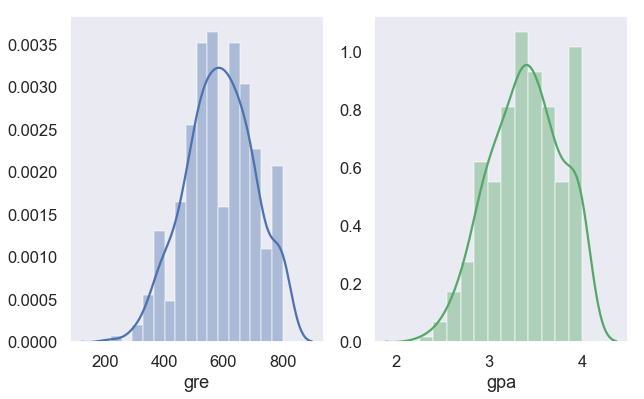

In [5]:
import seaborn as sns
sns.set(style="dark",context="talk")
f,(ax1, ax2) = plt.subplots(1,2, figsize=(10,6))
sns.distplot(dataset.iloc[:,1], ax=ax1, color="b");

#gpa scores
sns.distplot(dataset.iloc[:,2], ax=ax2, color="g");

plt.show()

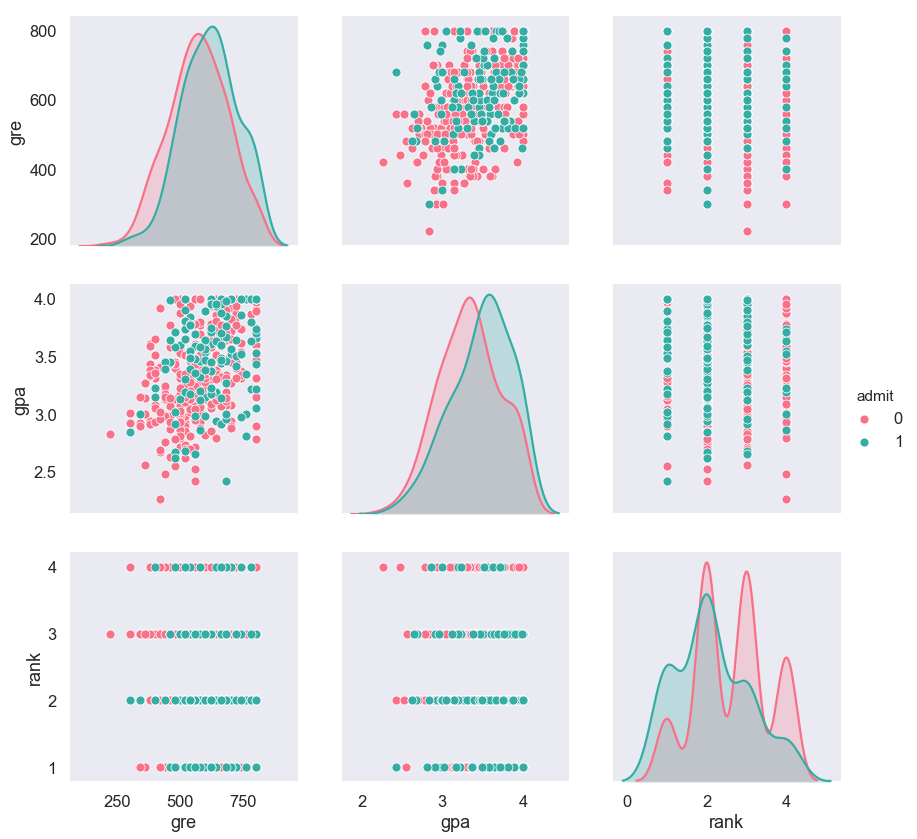

In [6]:
sns.pairplot(dataset, hue='admit',palette="husl", x_vars=["gre","gpa","rank"], y_vars=["gre","gpa","rank"], height=4)
plt.show()

In [7]:
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [8]:
dataArray = dataset.values

In [9]:
X = dataArray[:,1:4]
y = dataArray[:,0:1]

In [10]:
validation_size = 0.10
seed = 9
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=validation_size, random_state = seed)

In [11]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


(360, 3)
(40, 3)
(360, 1)
(40, 1)


In [12]:
num_trees = 200
max_features = 3
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
results = []
names = []
scoring = 'accuracy'

In [13]:
for name, model in models:
    kfold = KFold(n_splits = 10, random_state=7)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring = scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name,cv_results.mean(), cv_results.std())
    print(msg)


C:\Users\Sunny\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sunny\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Sunny\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sunny\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using rave

LR: 0.694444 (0.087841)
LDA: 0.700000 (0.088541)
KNN: 0.658333 (0.079592)
CART: 0.627778 (0.055833)


C:\Users\Sunny\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Sunny\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Sunny\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Sunny\AppData\Local\Continuum\anaconda3\lib\site-

RF: 0.680556 (0.048512)
NB: 0.688889 (0.088541)
SVM: 0.658333 (0.093830)


C:\Users\Sunny\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Sunny\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Sunny\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Sunny\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196:

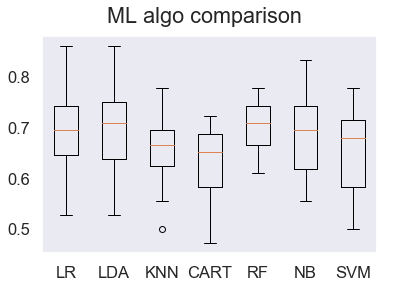

In [39]:
fig = pyplot.figure()
fig.suptitle('ML algo comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [23]:
model = LogisticRegression()
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

C:\Users\Sunny\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sunny\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [22]:
print("Model --- LogisticRegression")
print("Accuracy: {} ".format(accuracy_score(Y_test,predictions) * 100))
print(classification_report(Y_test, predictions))

Model --- LogisticRegression
Accuracy: 77.5 
              precision    recall  f1-score   support

         0.0       0.81      0.94      0.87        31
         1.0       0.50      0.22      0.31         9

   micro avg       0.78      0.78      0.78        40
   macro avg       0.65      0.58      0.59        40
weighted avg       0.74      0.78      0.74        40



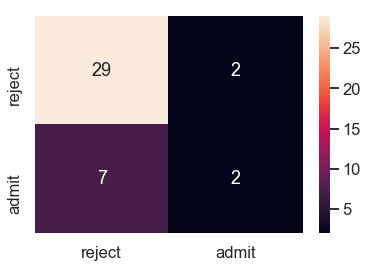

<Figure size 216x216 with 0 Axes>

In [16]:
cm = confusion_matrix(Y_test, predictions)
sns.heatmap(cm, annot=True, xticklabels=['reject','admit'], yticklabels=['reject','admit'])
plt.figure(figsize=(3,3))
plt.show()

In [17]:
new_data = [(720,4,1), (300,2,3) , (400,3,4) ]
new_array = np.asarray(new_data)
labels=["reject","admit"]
prediction=model.predict(new_array)

In [18]:
no_of_test_cases, cols = new_array.shape
for i in range(no_of_test_cases):
    print("Status of Student with GRE scores = {}, GPA grade = {}, Rank = {} will be ----- {}".format(new_data[i][0],new_data[i][1],new_data[i][2], labels[int(prediction[i])]))

Status of Student with GRE scores = 720, GPA grade = 4, Rank = 1 will be ----- admit
Status of Student with GRE scores = 300, GPA grade = 2, Rank = 3 will be ----- reject
Status of Student with GRE scores = 400, GPA grade = 3, Rank = 4 will be ----- reject
